In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
df = pd.read_csv('Data Sets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
pd.set_option('display.max_columns',50)

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.shape

(400, 26)

In [9]:
df[df.duplicated()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [10]:
df.duplicated().sum()

0

In [11]:
#Cleaning the data
for i in df.columns:
    print(i)
    print(set(df[i]))
    print('*********************')
    print('*********************')

id
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [12]:
df['classification']=df['classification'].replace(['ckd\t','ckd'])

In [13]:
df['cad']=df['cad'].replace(['\tno','no'])

In [14]:
df['dm']=df['dm'].replace(['\tno','\tyes',' yes'],['no','yes','yes'])

In [15]:
df['rc']=df['rc'].replace(['\t?',df['rc'].mode()[0]])

In [16]:
df['wc']=df['wc'].replace(['\t6200','\t8400','\t?'],['6200','8400',df['wc'].mode()[0]])

In [17]:
df['pcv']=df['pcv'].replace(['\t43','\t?'],['43',df['pcv'].mode()[0]])

In [18]:
#Checking for nulls
for i in df.columns:
    print(i)
    print(set(df[i]))
    print('*********************')
    print('*********************')

id
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [19]:
num_columns=df.select_dtypes(include=['int64','float64'])
num_columns

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


In [20]:
cat_columns=df.select_dtypes(exclude=['int64','float64'])
cat_columns1=cat_columns.drop(columns='classification',axis=1)
cat_columns

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,NaN,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,NaN,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,NaN,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,NaN,good,no,no,notckd


In [21]:
cat_columns1

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,NaN,good,no,no
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,NaN,good,no,no
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,NaN,good,no,no
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,NaN,good,no,no


In [22]:
from sklearn.impute import SimpleImputer


In [23]:
#Filling null values
SI_mean=SimpleImputer()
SI_mode=SimpleImputer(strategy='most_frequent')
df1=SI_mean.fit_transform(num_columns)
df2=SI_mode.fit_transform(cat_columns1)

                      

In [24]:
df1=pd.DataFrame(df1,columns=num_columns.columns)
df2=pd.DataFrame(df2,columns=cat_columns1.columns)
df1

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2


In [25]:
df2

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,38,6000,4.5,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,31,7500,4.5,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,yes,good,no,no
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,yes,good,no,no
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,yes,good,no,no
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,yes,good,no,no


In [26]:
df_new=pd.concat([df1,df2],axis=1)
df_new=pd.concat([df_new,df['classification']],axis=1)
df_new

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,normal,normal,notpresent,notpresent,38,6000,4.5,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,normal,normal,notpresent,notpresent,31,7500,4.5,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,yes,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,yes,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,yes,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,yes,good,no,no,notckd


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  rbc             400 non-null    object 
 13  pc              400 non-null    object 
 14  pcc             400 non-null    object 
 15  ba              400 non-null    object 
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [28]:
df_new.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [29]:
#Checking data for final time
for i in df_new.columns:
    print(i)
    print(set(df_new[i]))
    print('*********************')
    print('*********************')

id
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 

In [30]:
df_new['rc']

0      5.2
1      4.5
2      4.5
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 400, dtype: object

In [31]:
df_new['rc']=df_new['rc'].astype('float64')
df_new['wc']=df_new['wc'].astype('int64')
df_new['pcv']=df_new['pcv'].astype('int64')


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  rbc             400 non-null    object 
 13  pc              400 non-null    object 
 14  pcc             400 non-null    object 
 15  ba              400 non-null    object 
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [33]:
for i in df_new.columns:
    print(i)
    print(set(df_new[i]))
    print('*********************')
    print('*********************')

id
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 

In [34]:
#Class imbalance, outliers
cat_columns2=df_new.select_dtypes(exclude=['int64','float64'])
num_columns2=df_new.select_dtypes(include=['int64','float64'])


In [35]:
cat_columns2

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,yes,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,yes,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,yes,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,yes,good,no,no,notckd


In [36]:
num_columns2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44,7800,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38,6000,4.5
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31,7500,4.5
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32,6700,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35,7300,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47,6700,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54,7800,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49,6600,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51,7200,5.9


In [37]:
for i in cat_columns2.columns:
    print(cat_columns[i].value_counts())
    print()
    print()

rbc
normal      201
abnormal     47
Name: count, dtype: int64


pc
normal      259
abnormal     76
Name: count, dtype: int64


pcc
notpresent    354
present        42
Name: count, dtype: int64


ba
notpresent    374
present        22
Name: count, dtype: int64


htn
no     251
yes    147
Name: count, dtype: int64


dm
no     261
yes    137
Name: count, dtype: int64


cad
yes    276
no      12
Name: count, dtype: int64


appet
good    317
poor     82
Name: count, dtype: int64


pe
no     323
yes     76
Name: count, dtype: int64


ane
no     339
yes     60
Name: count, dtype: int64


classification
ckd       250
notckd    150
Name: count, dtype: int64




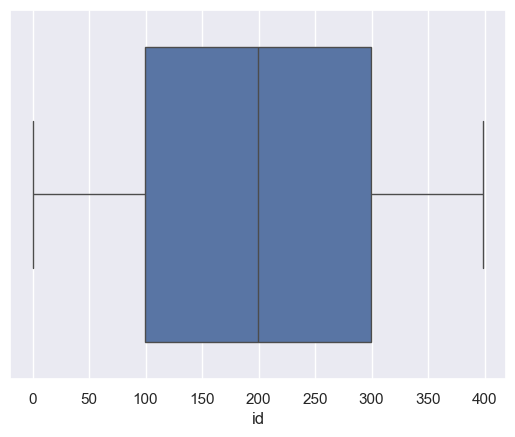

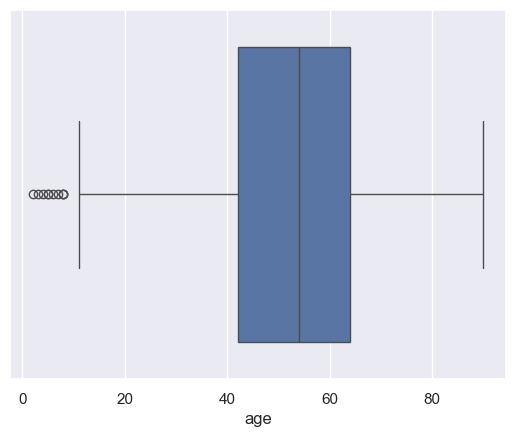

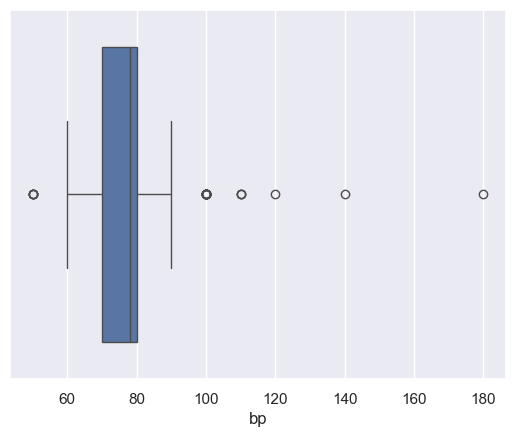

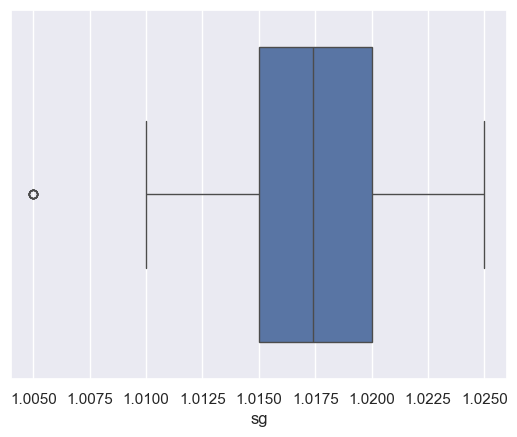

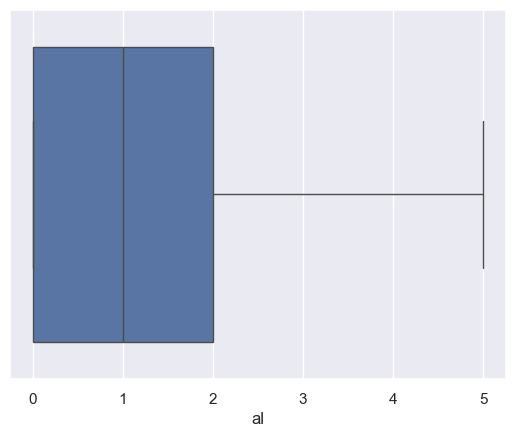

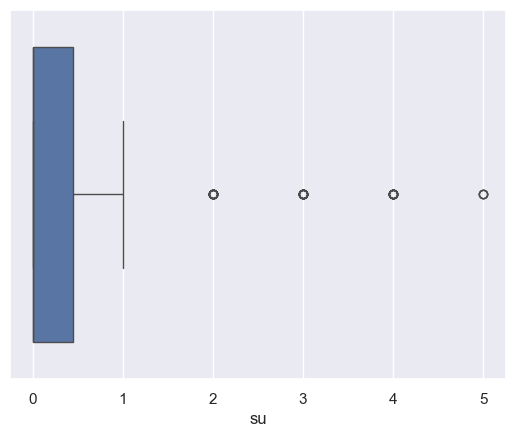

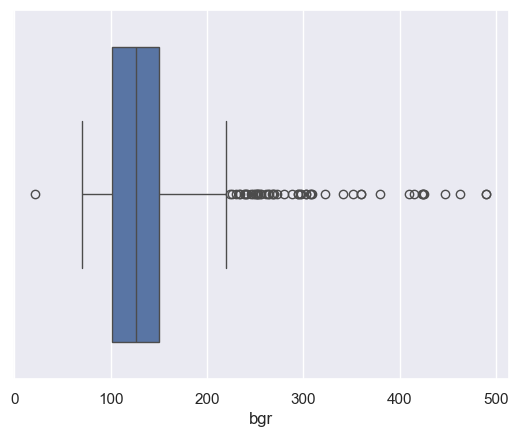

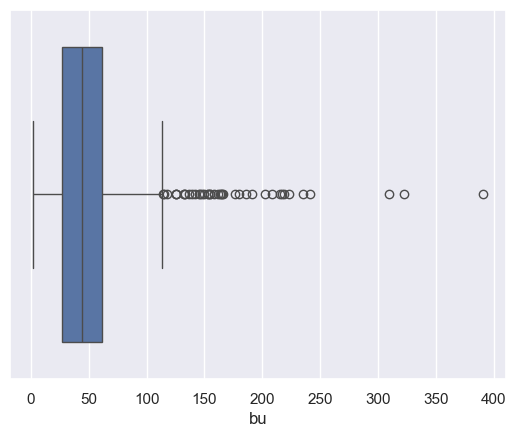

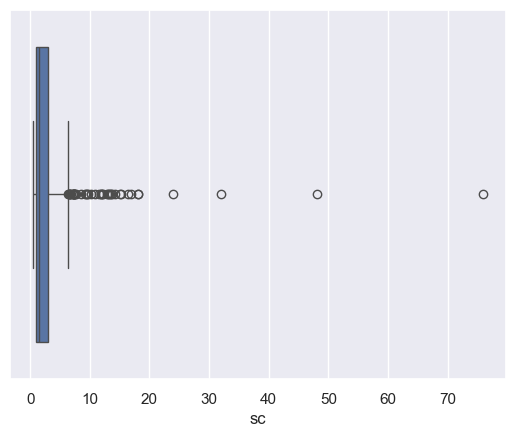

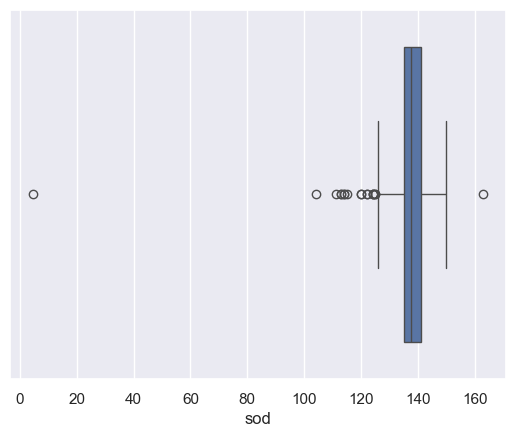

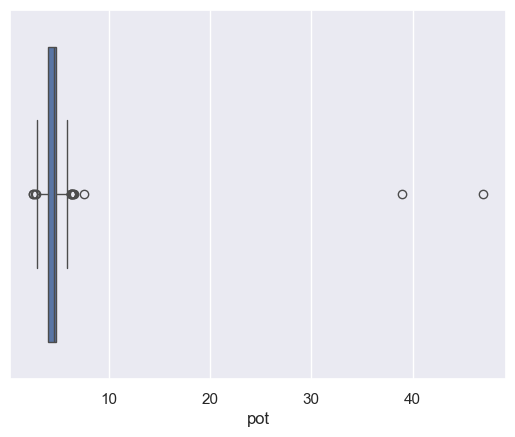

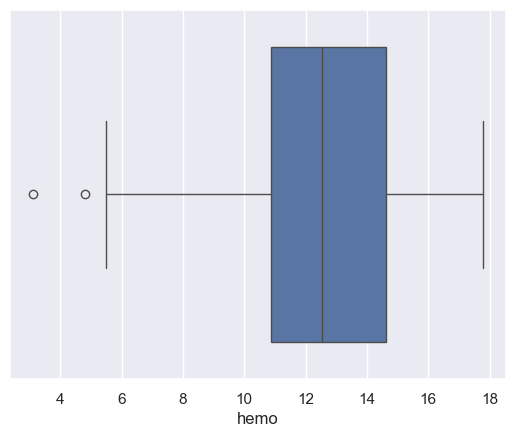

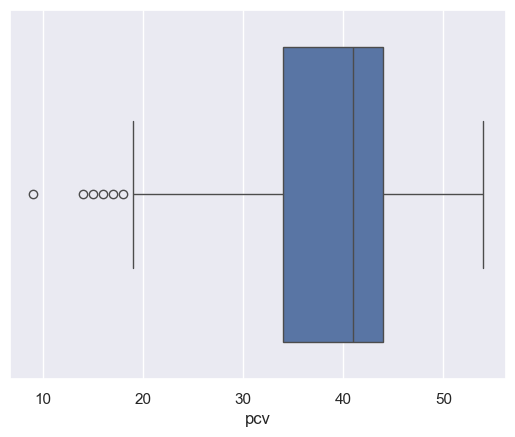

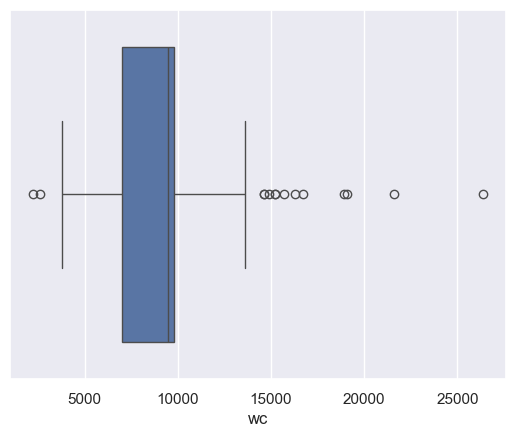

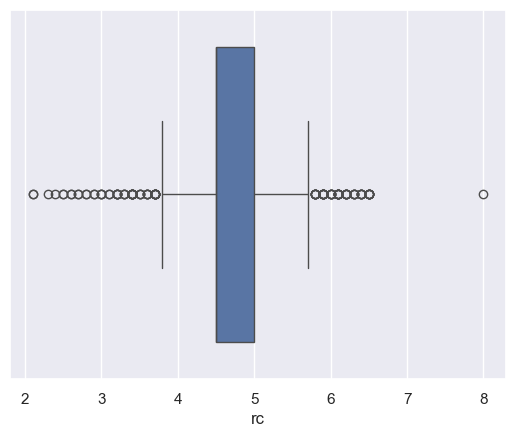

In [38]:
for i in num_columns2.columns:
    sns.boxplot(data=num_columns2,x=num_columns2[i])
    plt.show()
    

In [39]:
df_new

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,normal,normal,notpresent,notpresent,38,6000,4.5,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,normal,normal,notpresent,notpresent,31,7500,4.5,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,yes,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,yes,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,yes,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,yes,good,no,no,notckd


In [40]:
x=df_new.drop(columns=['classification','id'])
y=df_new['classification']
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,normal,normal,notpresent,notpresent,38,6000,4.5,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,normal,normal,notpresent,notpresent,31,7500,4.5,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,yes,good,no,no
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,yes,good,no,no
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,yes,good,no,no
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,yes,good,no,no


In [41]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [42]:
x_encoding=x.select_dtypes(include='object').columns
x_encoding

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [43]:
x[x_encoding]=pd.get_dummies(x[x_encoding],drop_first=True,dtype=int)
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,1,1,0,0,44,7800,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,1,1,0,0,38,6000,4.5,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,1,1,0,0,31,7500,4.5,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1,0,1,0,32,6700,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,1,1,0,0,35,7300,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,1,1,0,0,47,6700,4.9,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,1,1,0,0,54,7800,6.2,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,1,1,0,0,49,6600,5.4,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,1,1,0,0,51,7200,5.9,0,0,1,0,0,0


In [44]:
y=pd.DataFrame(y)
y=pd.get_dummies(y,drop_first=True,dtype=int)
y

,classification_notckd
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,stratify=y)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 24)
(320, 1)
(80, 24)
(80, 1)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession    0.9500
1           Dtree    0.9875
2             KNN    0.7250
3             SVM    0.6625
4             NBT    0.9375
5          Voting    0.9750
Axes(0.125,0.11;0.775x0.77)


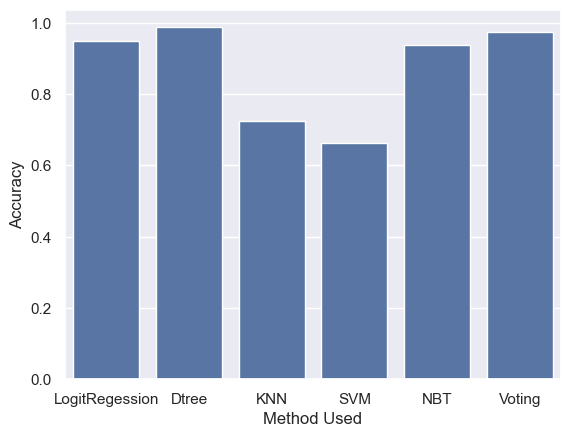

In [48]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
print(chart)                          
                               

In [49]:
#Checking overfitting
y_pred_dt_train = dtree.predict(x_train)
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_train, y_pred_dt_train))

0.9875
1.0


In [50]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [115]:
#CV
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(dtree,x_train,y_train,cv=10)
print(str(accuracy.mean())+'+/-'+ str(accuracy.std()))


0.975+/-0.030618621784789725


In [117]:
confusion_matrix(y_test, y_pred_dt)

array([[49,  1],
       [ 0, 30]], dtype=int64)

In [2]:
def fun(a):
    b=a
    return(b)

fun(15)


15